In [28]:
import os
import pyciemss
import torch
import pandas as pd
import numpy as np
from typing import Dict, List, Callable
import sympy

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.integration_utils.intervention_builder import (
    param_value_objective,
    start_time_objective,
)

import json
from mira.metamodel import *
from mira.modeling.amr.petrinet import template_model_to_petrinet_json
from mira.sources.amr.petrinet import template_model_from_amr_json



smoke_test = ('CI' in os.environ)

In [3]:
MODEL_PATH = "https://raw.githubusercontent.com/gyorilab/mira/main/notebooks/evaluation_2024.03/epi_scenario5/scenario5_petrinet.json"

In [60]:
end_time = 1000.0
logging_step_size = 0.1
num_samples = 1

## Question 1a (Lactose = 0)

In [65]:

with open("scenario5_petrinet.json", 'r') as fh:
    tm = template_model_from_amr_json(json.load(fh))

print(tm.initials['Lactose'].expression)

tm.initials['Lactose'].expression = SympyExprStr(sympy.Float(100))

print(tm.initials['Lactose'].expression)

with open('scenario5_petrinet_no_lactose.json', 'w') as fh:    
    json.dump(template_model_to_petrinet_json(tm), fh, indent=1)

500.0
100.0


In [66]:
result_no_lactose = pyciemss.sample('scenario5_petrinet_no_lactose.json', 
                                    end_time, logging_step_size, num_samples, 
                                    )

In [67]:
display(result_no_lactose["data"])


,timepoint_id,sample_id,timepoint_unknown,I_state,I_Lactose_state,I_Op_state,Lactose_state,Op_state,RNAP_state,RNAP_Op_state,Z_state,i_state,r_I_state,r_lac_state
0,0,0,0.1,46.797115,2.364293,0.828753,97.635735,0.003259,99.832001,0.167988,0.000002,1.0,0.001999,0.000420
1,1,0,0.2,44.614220,4.534523,0.831603,95.465523,0.000285,99.831863,0.168112,0.000009,1.0,0.003996,0.000924
2,2,0,0.3,42.601704,6.536875,0.831995,93.463173,0.000284,99.832268,0.167720,0.000020,1.0,0.005991,0.001426
3,3,0,0.4,40.740398,8.388047,0.832367,91.612007,0.000294,99.832649,0.167339,0.000037,1.0,0.007984,0.001927
4,4,0,0.5,39.015743,10.102609,0.832727,89.897415,0.000304,99.833015,0.166969,0.000059,1.0,0.009975,0.002426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,0,999.5,30.598297,59.095791,0.923337,39.456181,0.000303,99.922295,0.076358,2.465327,1.0,1.999917,0.241092
9995,9995,0,999.599976,30.599482,59.096661,0.923340,39.455215,0.000303,99.922295,0.076355,2.465175,1.0,1.999917,0.241080
9996,9996,0,999.700012,30.600674,59.097557,0.923343,39.454247,0.000303,99.922295,0.076352,2.465024,1.0,1.999917,0.241068
9997,9997,0,999.799988,30.601862,59.098305,0.923346,39.453281,0.000303,99.922295,0.076349,2.464872,1.0,1.999916,0.241056


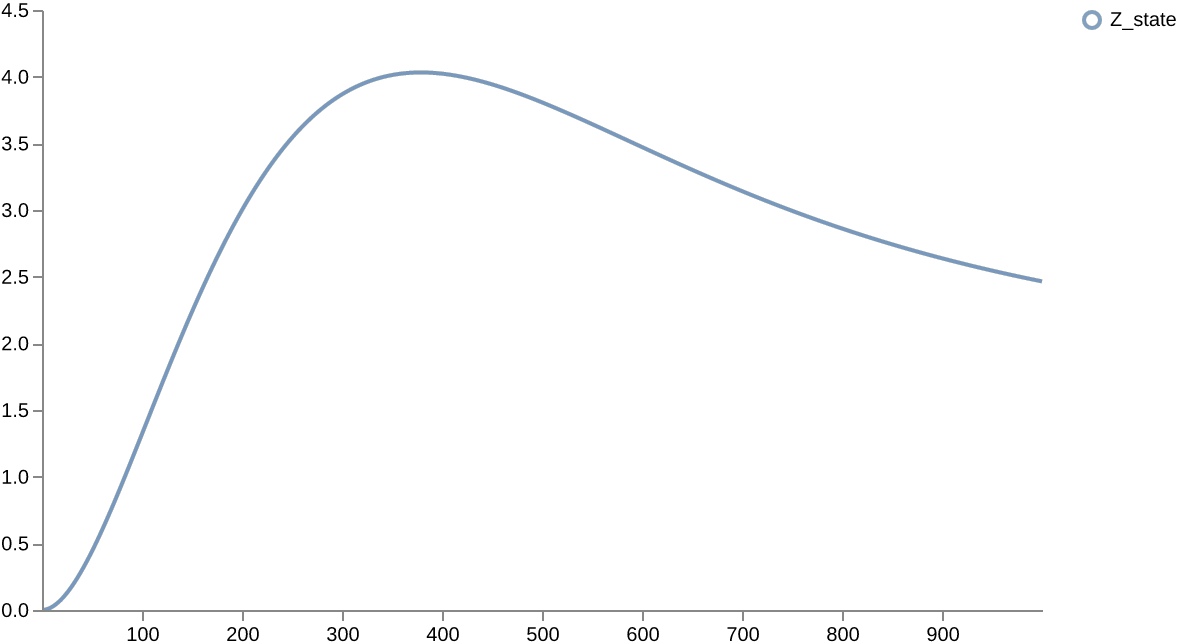

In [68]:
# Plot Z, lactose = 100
schema = plots.trajectories(result_no_lactose["data"], keep=".*Z_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [73]:
z = result_no_lactose["data"]["Z_state"]
# find max of Z and its index
max_z = np.max(z)
max_z_index = np.argmax(z)

print(max_z, max_z_index)

4.031512260437012 3787


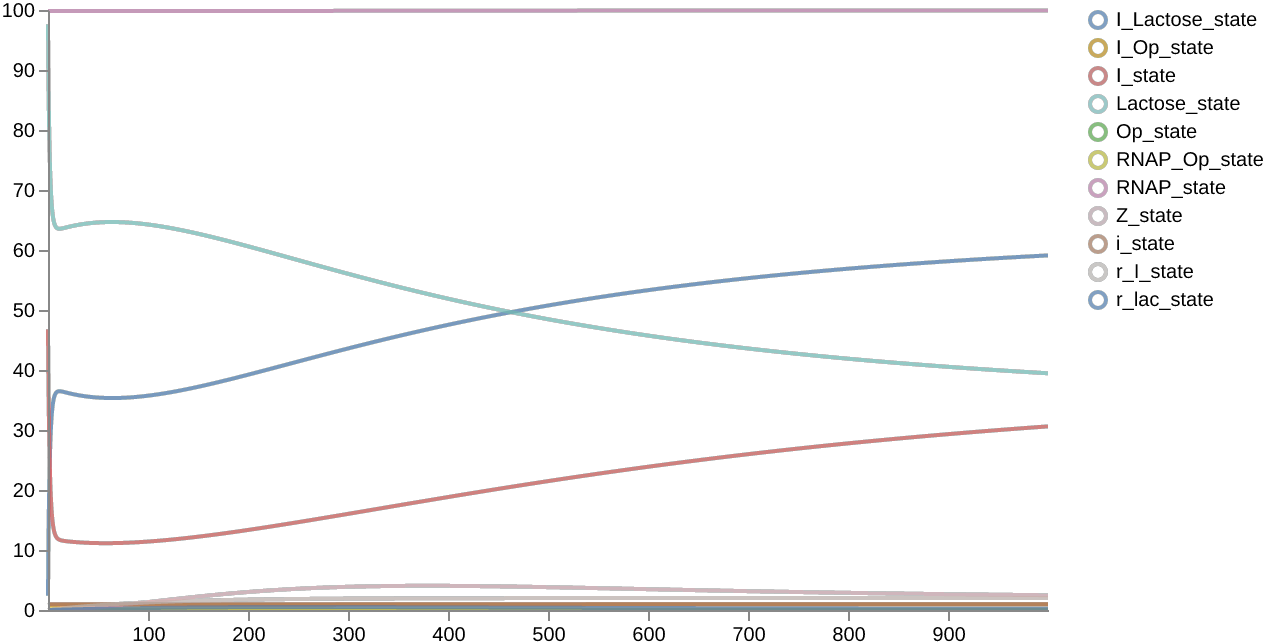

In [71]:
schema = plots.trajectories(result_no_lactose["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Question 1b (Lactose = 500)

In [75]:
result = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples)

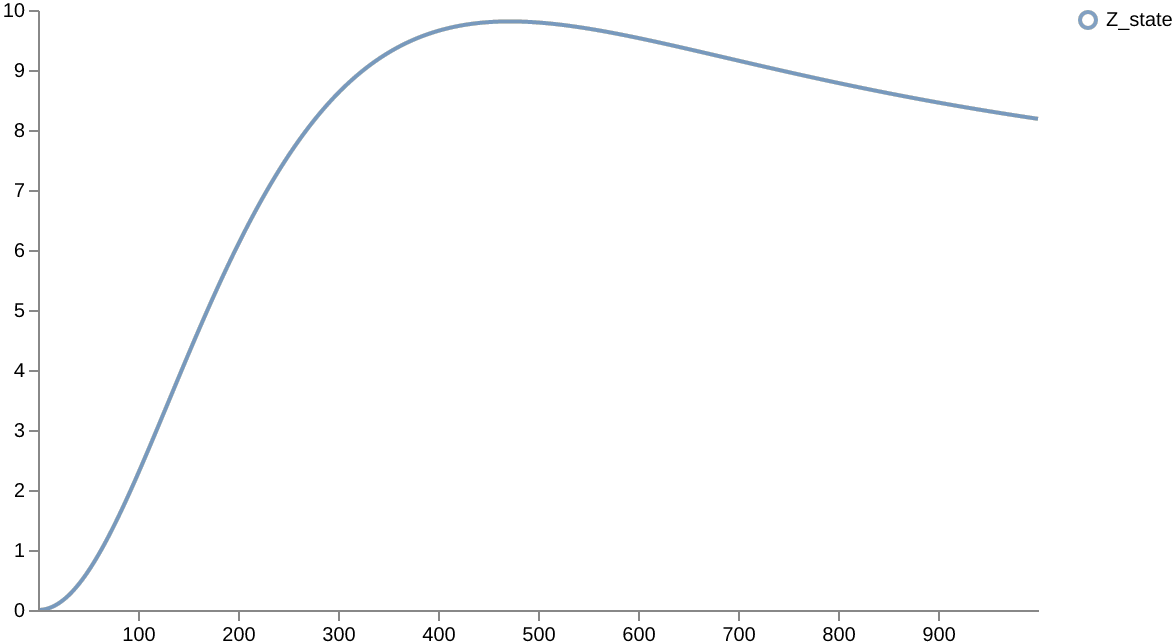

In [77]:
# Plot Z, lactose = 500
schema = plots.trajectories(result["data"], keep=".*Z_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [78]:
z = result["data"]["Z_state"]
# find max of Z and its index
max_z = np.max(z)
max_z_index = np.argmax(z)

print(max_z, max_z_index)

9.80962085723877 4715


## Question 2


In [80]:
static_state_intervention = {torch.tensor(500.0): {'Lactose': lambda x: x+  500.0}}

results_addition = pyciemss.sample('scenario5_petrinet_no_lactose.json', end_time, logging_step_size, num_samples,
                                    static_state_interventions=static_state_intervention)

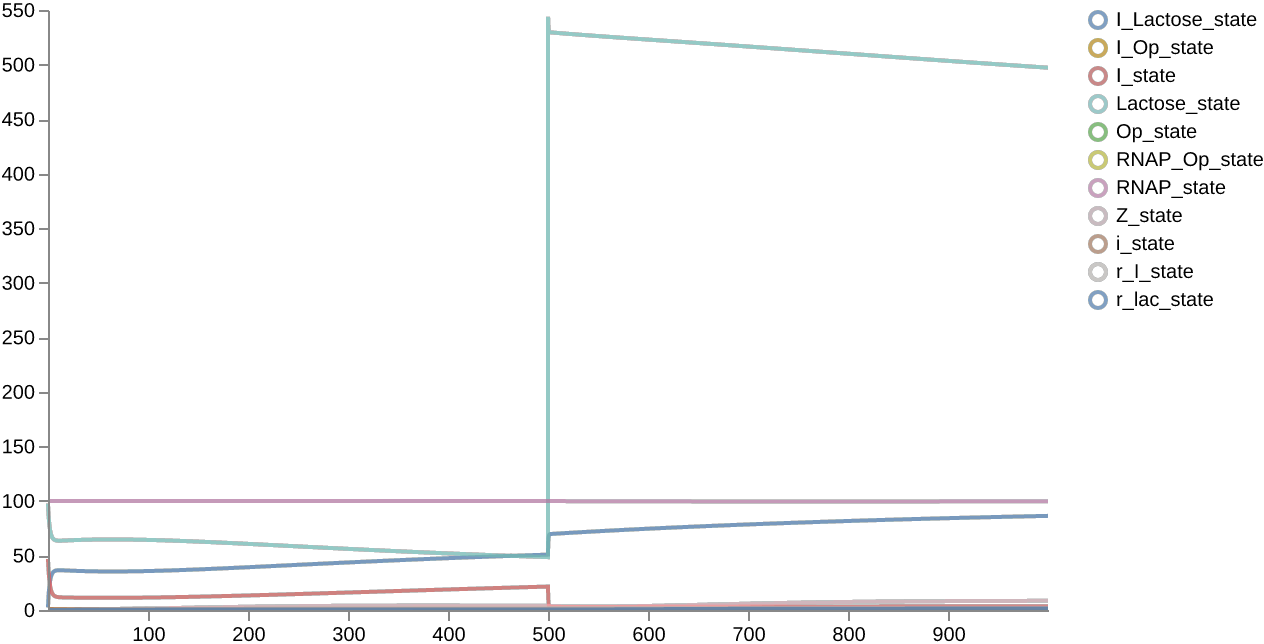

In [81]:
schema = plots.trajectories(results_addition["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)